In [3]:
import pandas as pd
import numpy.random as np
import matplotlib.pyplot as plt

In [12]:
# Crear datos
N=["David","Alejandro","Marcela","Lucas","Marcela"]
N=[N[np.randint(0,len(N))] for i in range(1000)]

E=[np.randint(17,45) for i in range(1000)]

P=dict(zip(N,E))
len(P)

4

In [14]:
np.seed(111)

def CreateDataset(Number):
    Out=[]
    for i in range(Number):
        # Crear un rango de fechas
        rng=pd.date_range(start="1/1/2009",end="12/31/2012", freq="W-MON")
        data=np.randint(25,1000,len(rng))
        status=[1,2,3]
        random_status=[status[np.randint(0,len(status))] for i in range(len(rng))]
        states=['GA','FL','fl','NY','NJ','TX']
        random_state=[states[np.randint(0,len(states))] for i in range(len(rng))]
        Out.extend(zip(random_state,random_status,data,rng)) # La función extend prolonga las listas
    return Out
CreateDataset(1)

[('GA', 1, 877, Timestamp('2009-01-05 00:00:00', freq='W-MON')),
 ('FL', 1, 901, Timestamp('2009-01-12 00:00:00', freq='W-MON')),
 ('fl', 3, 749, Timestamp('2009-01-19 00:00:00', freq='W-MON')),
 ('FL', 3, 111, Timestamp('2009-01-26 00:00:00', freq='W-MON')),
 ('GA', 1, 300, Timestamp('2009-02-02 00:00:00', freq='W-MON')),
 ('FL', 2, 706, Timestamp('2009-02-09 00:00:00', freq='W-MON')),
 ('TX', 3, 347, Timestamp('2009-02-16 00:00:00', freq='W-MON')),
 ('fl', 2, 143, Timestamp('2009-02-23 00:00:00', freq='W-MON')),
 ('FL', 3, 833, Timestamp('2009-03-02 00:00:00', freq='W-MON')),
 ('NY', 1, 992, Timestamp('2009-03-09 00:00:00', freq='W-MON')),
 ('fl', 2, 978, Timestamp('2009-03-16 00:00:00', freq='W-MON')),
 ('TX', 2, 32, Timestamp('2009-03-23 00:00:00', freq='W-MON')),
 ('GA', 2, 293, Timestamp('2009-03-30 00:00:00', freq='W-MON')),
 ('fl', 1, 291, Timestamp('2009-04-06 00:00:00', freq='W-MON')),
 ('fl', 3, 474, Timestamp('2009-04-13 00:00:00', freq='W-MON')),
 ('NJ', 2, 905, Timestamp(

In [16]:
dataset=CreateDataset(4)
df=pd.DataFrame(dataset,columns=['State','Status','CustomerCount','StatusDate'])
df.to_csv("seccion_3.csv",index=False)
df.head()

,State,Status,CustomerCount,StatusDate
0,NY,1,681,2009-01-05
1,TX,2,147,2009-01-12
2,NY,3,110,2009-01-19
3,GA,1,301,2009-01-26
4,FL,1,261,2009-02-02


In [159]:
Location=r"C:\Users\TOSHIBA-PC\Google Drive\Python\seccion_3.csv"
df=pd.read_csv(Location,index_col="StatusDate")
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


In [160]:
df["State"]=df.State.apply(lambda x: x.upper())

In [161]:
# Filtrar por columna y un valor
mask=df["Status"]==2
df[mask].head()

,State,Status,CustomerCount
StatusDate,,,
2009-02-09,FL,2,706
2009-02-23,FL,2,143
2009-03-16,FL,2,978
2009-03-23,TX,2,32
2009-03-30,GA,2,293


In [162]:
#Convertir valores
mask=df.State=="NJ"
df["State"][mask]="NY"
df.head()

C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,FL,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


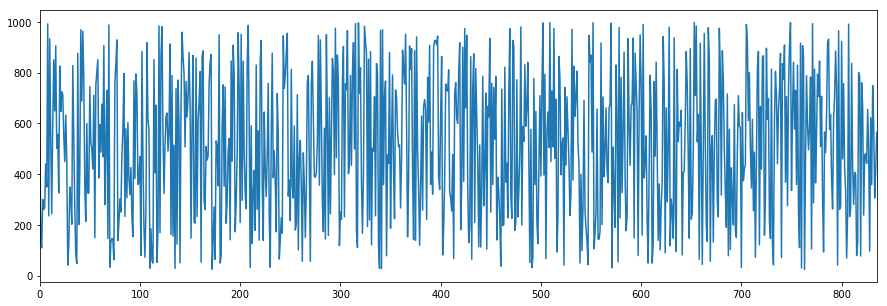

In [17]:
df["CustomerCount"].plot(figsize=(15,5))
plt.show()

In [19]:
sortdf=df[df["State"]=="NY"].sort_index(axis=0)
sortdf.head()

,State,Status,CustomerCount,StatusDate
0,NY,1,681,2009-01-05
2,NY,3,110,2009-01-19
9,NY,2,236,2009-03-09
11,NY,2,538,2009-03-23
17,NY,2,502,2009-05-04


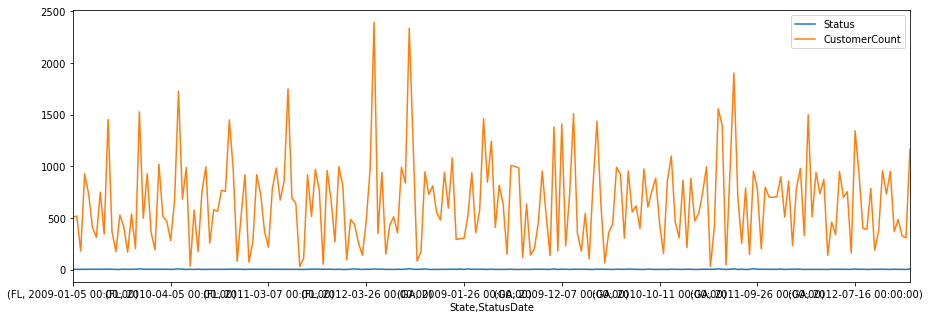

            Status  CustomerCount
StatusDate                       
2009-01-05       2            506
2009-02-02       2            518
2009-02-16       3            179
2009-03-30       3            927
2009-04-13       3            737
2009-04-27       1            410
2009-05-04       2            312
2009-05-18       1            749
2009-05-25       3            343
2009-06-15       4           1453
2009-07-06       2            366
2009-07-13       1            173
2009-07-27       1            528
2009-08-03       4            416
2009-08-24       2            168
2009-09-14       2            538
2009-10-05       3            202
2009-11-09       6           1526
2010-01-04       3            497
2010-01-18       3            927


In [22]:
df=df.groupby(by=["State","StatusDate"]).sum()
df.loc[["FL","GA"]].plot(figsize=(15,5))
plt.show()
print(df.loc["FL"].head(20))

In [25]:
# Agrupar datos
Daily = df.reset_index().groupby(["State","StatusDate"]).sum()
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-05       2            506
      2009-02-02       2            518
      2009-02-16       3            179
      2009-03-30       3            927
      2009-04-13       3            737

In [82]:
# Eliminar columnas de un dataframe
del Daily["Status"]
Daily.head()

CustomerCount
State StatusDate               
FL    2009-01-05            760
      2009-01-12           2538
      2009-01-19            895
      2009-01-26            547
      2009-02-02           1506

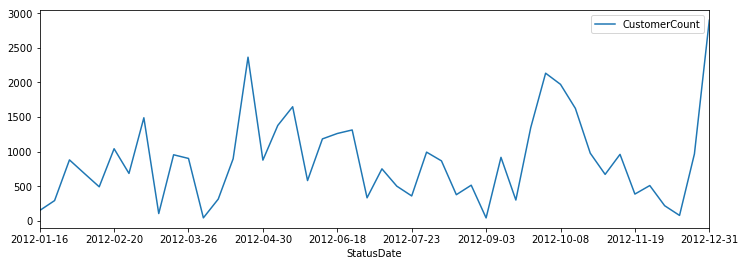

In [92]:
# Hacer gráficos por estado
Daily.loc["FL"]["2012":].plot(figsize=(12,4))
plt.show()

In [96]:
# Cálculo de outliers
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Upper'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper']) 

AttributeError: 'Index' object has no attribute 'year'